**SENTIMENT ANALYSIS**

Muh Amri Sidiq

**Installation Packages**

In [15]:
!pip install keras-tuner
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, Dot, Activation, GlobalAveragePooling1D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import keras_tuner as kt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import nltk
import re
nltk.download('stopwords')
nltk.download('punkt')

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Introduction**

Sentiment analysis is the process of analyzing text to determine the attitudes, emotions, or opinions contained within it. Typically, this analysis is used to identify whether a text has a positive, negative, or neutral sentiment, although some applications can also detect more specific emotions, such as angry, happy, or sad.

**Load Data**

In [16]:
df=pd.read_csv('/content/twitter_training.csv')
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


change name column for easy to read of data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [17]:
df = df.rename(columns={'2401': 'number', 'Borderlands': 'theme',
                        'Positive': 'sentiment', 'im getting on borderlands and i will murder you all ,': 'text'})

from above comand we have 74681 row, 4 column, int64 data types 1 column, object data types 3 column. in column `text` non-null data or non missing values data total 73995 row. explain every columns in below:

 - `number`   : number of data row
 - `theme`    : topic of sentiment
 - `sentiment`: target of us (negative, positive, neutral and irrelevant)
 - `text`     : review of text

check missing values

In [ ]:
df.isnull().sum()

,0
number,0
theme,0
sentiment,0
text,686


any data missing values in text total 686 row

In [18]:
df_clean = df.dropna(subset='text')
df_clean.isnull().sum()

,0
number,0
theme,0
sentiment,0
text,0


we use data only complette

**Exploratory data Analys**

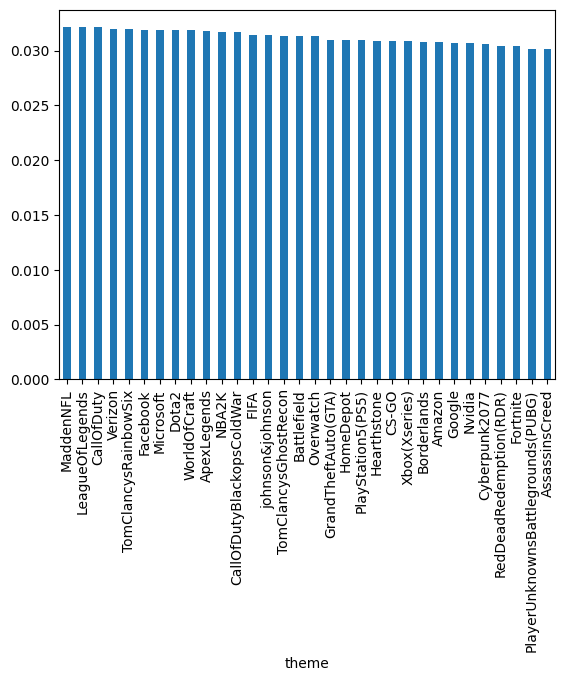

In [ ]:
df_clean['theme'].value_counts(normalize=True).plot(kind='bar');

biggest contribution theme `maddenNFL` and lowest contribution is `AssasinsCreed`

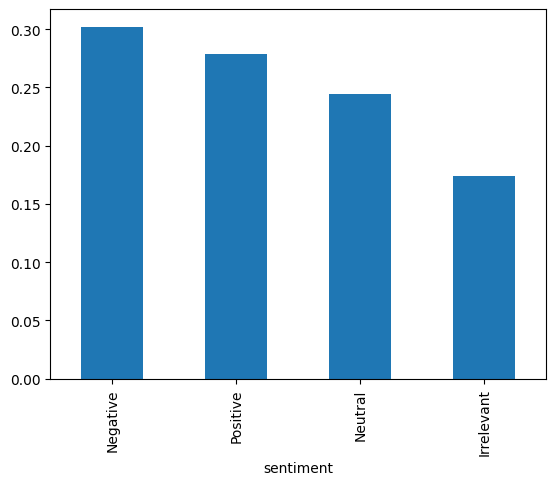

In [ ]:
df_clean['sentiment'].value_counts(normalize=True).plot(kind='bar');

from bar above `negative` is largest and `Irrelevant` is lowest sentiment

**Labels for Sentiment**

In [19]:
df_clean['sentiment'] = df['sentiment'].replace({
    'Negative': 0,
    'Positive': 1,
    'Neutral': 2,
    'Irrelevant': 3})
df_clean['sentiment'].value_counts()

<ipython-input-19-5a976ca69783>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean['sentiment'] = df['sentiment'].replace({
<ipython-input-19-5a976ca69783>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['sentiment'] = df['sentiment'].replace({


,count
sentiment,
0,22358
1,20654
2,18108
3,12875


In [ ]:
df_clean.head()

,number,theme,sentiment,text
0,2401,Borderlands,1,I am coming to the borders and I will kill you...
1,2401,Borderlands,1,im getting on borderlands and i will kill you ...
2,2401,Borderlands,1,im coming on borderlands and i will murder you...
3,2401,Borderlands,1,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,1,im getting into borderlands and i can murder y...


**Stop Word Removal**

clean text URL, number, tag HTML, special character and sign ask, clean space over

In [20]:
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = str(text)

    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r"<.*?>", '', text)
    text = re.sub(r"\d+", '', text)
    text = re.sub(r"[^a-zA-Z\s]", '', text)
    text = text.lower()
    text = ' '.join([word for word in text.split() if word not in stop_words])
    text = text.strip()
    return text

df_clean['text_clean'] = df_clean['text'].apply(clean_text)

<ipython-input-20-d7bb2ef42f3d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_clean'] = df_clean['text'].apply(clean_text)


**Tokenize**

Tokenize is the process of breaking the text into small units called tokens. Tokens can be words, phrases, characters, or even other elements depending on the purpose of the analysis. This process is the first step in natural language processing (NLP) to prepare the text for further analysis or processing.

In [ ]:
df_clean.shape

(73995, 5)

In [21]:
tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(df_clean['text_clean'])

df_clean['text_clean'] = tokenizer.texts_to_sequences(df_clean['text_clean'])
max_len = 50
df_clean['text_padding'] = pad_sequences(df_clean['text_clean'], maxlen=max_len, padding='post').tolist()

<ipython-input-21-f884a57e2b65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_clean'] = tokenizer.texts_to_sequences(df_clean['text_clean'])
<ipython-input-21-f884a57e2b65>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_padding'] = pad_sequences(df_clean['text_clean'], maxlen=max_len, padding='post').tolist()


**Train-Test Split**

separate for train and test, this data for model LSTM

In [22]:
X = df_clean['text_padding']
y = df_clean['sentiment']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

**Modeling**

1. Naive Bayes

Naive Bayes is one of the most popular algorithms for sentiment analysis, mainly due to its simplicity and computational efficiency. It is based on Bayes' Theorem with the assumption that all features are conditionally independent (which is often not strictly true, but sufficient for many practical applications). Text for Naive bayes must be string

In [24]:
df_clean['text_string'] = df_clean['text_clean'].astype(str)

Xnb = df_clean['text_string']
ynb = df_clean['sentiment']

<ipython-input-24-9aef5bce14e1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['text_string'] = df_clean['text_clean'].astype(str)


In [25]:
X_train_nb, X_test_nb, y_train_nb, y_test_nb = train_test_split(Xnb, ynb, test_size=0.2, random_state=123)

In [26]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train_nb)
X_test_vectorized = vectorizer.transform(X_test_nb)

model_nb = MultinomialNB(alpha=1.0)
model_nb.fit(X_train_vectorized, y_train_nb)

MultinomialNB()

In [ ]:
y_pred_nb = model_nb.predict(X_test_vectorized)

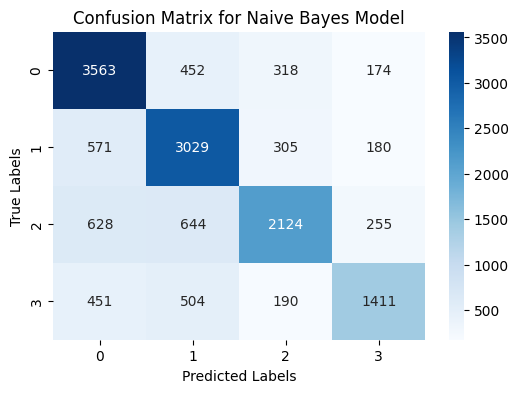

In [ ]:
cm = confusion_matrix(y_test_nb, y_pred_nb, labels=model_nb.classes_)
cm_df = pd.DataFrame(cm, index=model_nb.classes_, columns=model_nb.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

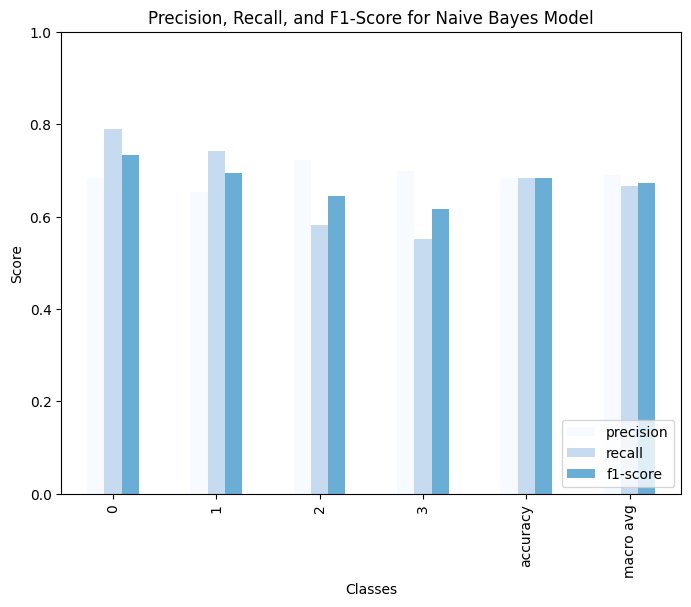

In [ ]:
report = classification_report(y_test_nb, y_pred_nb, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6), color=plt.cm.Blues(range(0, 256, 64)))
plt.title("Precision, Recall, and F1-Score for Naive Bayes Model")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy_score(y_test_nb, y_pred_nb)

0.684302993445503

2. Super Vector Machine

Support Vector Machine (SVM) is a machine learning algorithm often used for sentiment analysis due to its robust performance, especially on high-dimensional datasets such as text. SVM works by finding the best hyperplane that separates the classes in the feature space. Super vestor machine only use string, so we use data from above for naive bayes too.

In [ ]:
model_svc = SVC(kernel='linear', C=1)
model_svc.fit(X_train_vectorized, y_train_nb)

SVC(C=1, kernel='linear')

In [ ]:
y_pred_svc = model_svc.predict(X_test_vectorized)

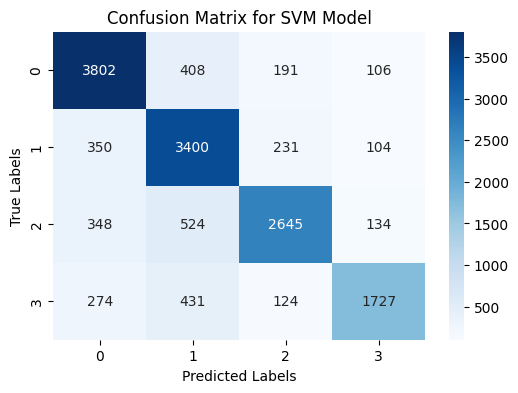

In [ ]:
cm = confusion_matrix(y_test_nb, y_pred_svc, labels=model_svc.classes_)
cm_df = pd.DataFrame(cm, index=model_svc.classes_, columns=model_svc.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()

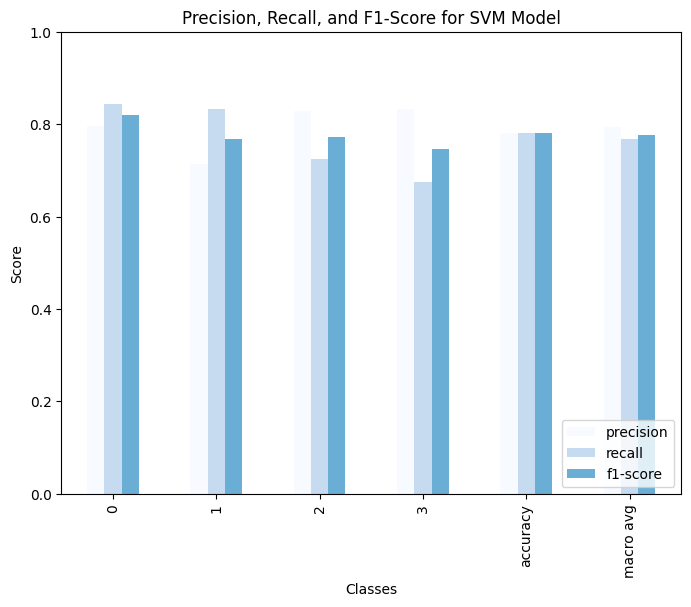

In [ ]:
report = classification_report(y_test_nb, y_pred_svc, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6), color=plt.cm.Blues(range(0, 256, 64)))
plt.title("Precision, Recall, and F1-Score for SVM Model")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy_score(y_test_nb, y_pred_svc)

0.7820798702615042

3. LSTM

LSTM (Long Short-Term Memory) is a type of recurrent neural network (RNN) architecture that is very popular for sentiment analysis due to its ability to capture context from sequences of data, such as text. LSTM is designed to overcome the vanishing gradient problem often experienced by standard RNNs, making it better at capturing long-term relationships in text.

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

from tensorflow.keras.preprocessing.sequence import pad_sequences
X_train = pad_sequences(X_train, maxlen=50, padding='post')
X_test = pad_sequences(X_test, maxlen=50, padding='post')

# Input layer
inputs = Input(shape=(50,))

# Embedding layer
embedding = Embedding(input_dim=10000, output_dim=16)(inputs)

# Bidirectional LSTM layer
lstm = Bidirectional(LSTM(32, return_sequences=True))(embedding)

# Attention mechanism
attention = Dot(axes=[2, 2])([lstm, lstm])  # Attention scores
attention = Activation('softmax')(attention)  # Softmax activation
context = Dot(axes=[2, 1])([attention, lstm])  # Context vector

# Flatten context vector to fit Dense output layer
context = GlobalAveragePooling1D()(context)

# Output layer for multi-class classification
output = Dense(4, activation='softmax')(context)

# Build and compile the model
model_basic_lstm = Model(inputs=inputs, outputs=output)
model_basic_lstm.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_basic_lstm.fit(X_train, y_train,
                               validation_data=(X_test, y_test),
                               epochs=15,
                               callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=8)])

Epoch 1/15
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 79s 41ms/step - accuracy: 0.4229 - loss: 1.2521 - val_accuracy: 0.6440 - val_loss: 0.9086
Epoch 2/15
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.6942 - loss: 0.8101 - val_accuracy: 0.7346 - val_loss: 0.7172
Epoch 3/15
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.7896 - loss: 0.5840 - val_accuracy: 0.7640 - val_loss: 0.6461
Epoch 4/15
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 82s 39ms/step - accuracy: 0.8273 - loss: 0.4858 - val_accuracy: 0.7751 - val_loss: 0.6129
Epoch 5/15
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 83s 40ms/step - accuracy: 0.8431 - loss: 0.4324 - val_accuracy: 0.7783 - val_loss: 0.6002
Epoch 6/15
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 82s 40ms/step - accuracy: 0.8532 - loss: 0.3912 - val_accuracy: 0.7843 - val_loss: 0.6053
Epoch 7/15
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 77s 42ms/step - accuracy: 0.8668 - loss: 0.3543 - val_accuracy: 0.7928 - val_loss: 0.6018
Epoch 8/15
1850/1850 ━━━━━━━━━━━━━━━━━━━━ 73s 40ms/step - accuracy: 0.8747 -

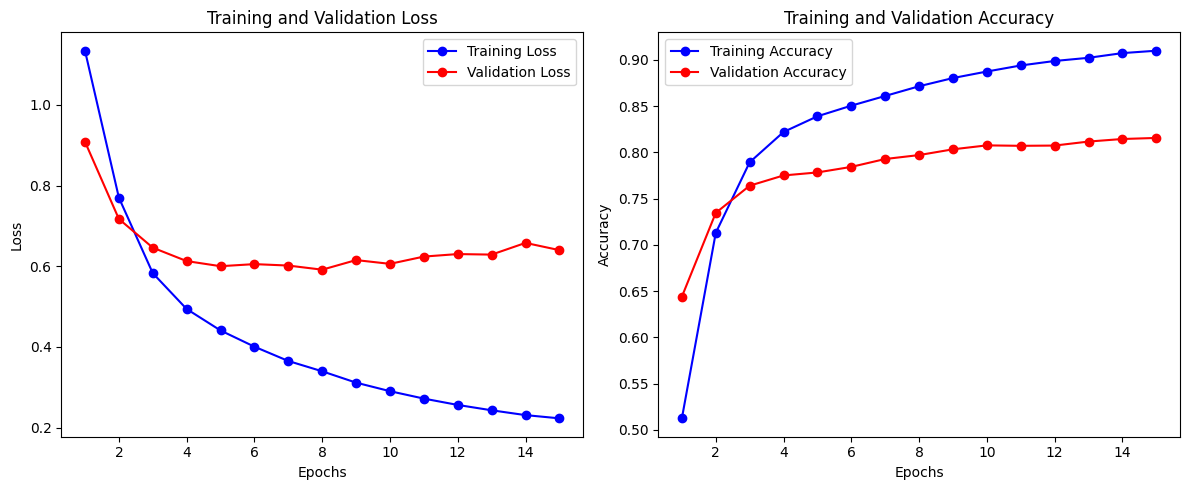

In [ ]:
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']
accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

epochs = range(1, len(loss) + 1)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
y_pred_basic = np.argmax(model_basic_lstm.predict(X_test), axis=1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step


In [ ]:
label_mapping = {
    0: "Negative",
    1: "Positive",
    2: "Neutral",
    3: "Irrelevant"}

y_pred_basic_label = np.vectorize(label_mapping.get)(y_pred_basic)
y_test_label = np.vectorize(label_mapping.get)(y_test)

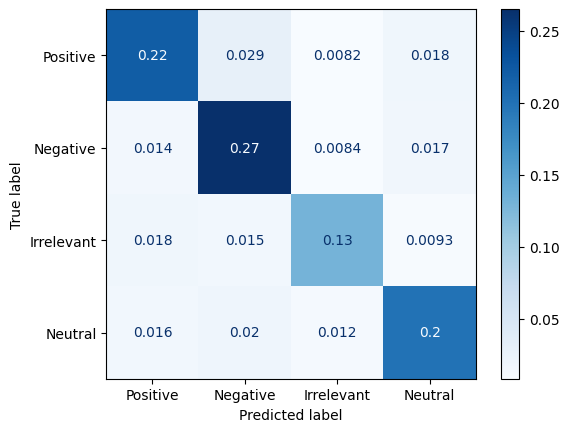

In [ ]:
y_unique_basic = list(set(y_test_label))
cm = confusion_matrix(y_test_label, y_pred_basic_label, labels = y_unique_basic, normalize='all')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique_basic)
disp.plot(cmap='Blues')

In [ ]:
accuracy_score(y_test, y_pred_basic)

0.8155956483546185

**Hyperparamater Tuning**

1. Naive Bayes

In [ ]:
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}
model_nb_tuning = MultinomialNB()
grid_search = GridSearchCV(model_nb_tuning, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vectorized, y_train)

best_model_nb = grid_search.best_estimator_

In [ ]:
y_pred_nb_tuning = best_model_nb.predict(X_test_vectorized)

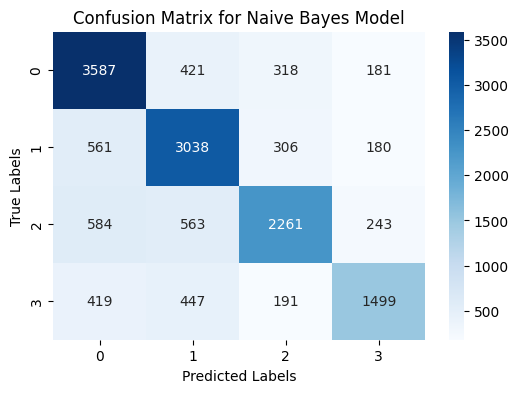

In [ ]:
cm = confusion_matrix(y_test_nb, y_pred_nb_tuning, labels=best_model_nb.classes_)
cm_df = pd.DataFrame(cm, index=best_model_nb.classes_, columns=best_model_nb.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Naive Bayes Model')
plt.show()

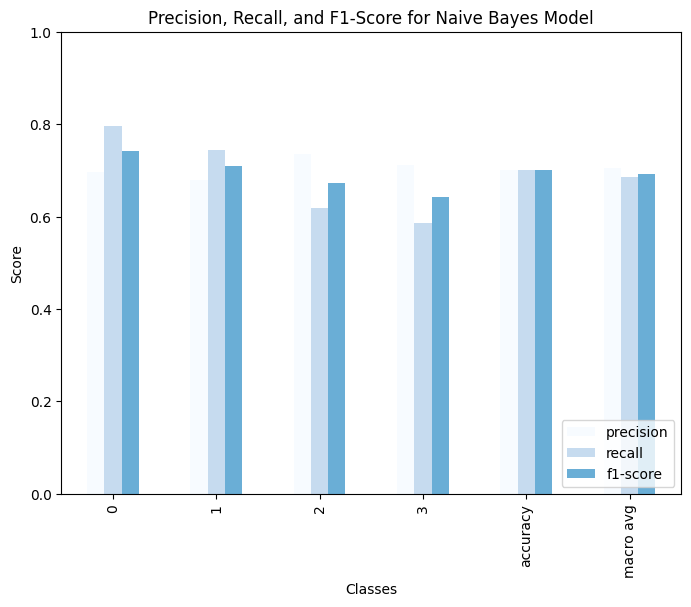

In [ ]:
report = classification_report(y_test_nb, y_pred_nb_tuning, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6), color=plt.cm.Blues(range(0, 256, 64)))
plt.title("Precision, Recall, and F1-Score for Naive Bayes Model")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

In [ ]:
accuracy_score(y_test_nb, y_pred_nb_tuning)

0.7017366038245827

2. Super Vector Machine

SVM proses is so long, so we use PCA

In [27]:
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_vectorized)
X_test_pca = pca.transform(X_test_vectorized)

In [28]:
svm = SVC()

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf']
}

grid_search = GridSearchCV(svm, param_grid, cv=2, scoring='accuracy', verbose=1)
grid_search.fit(X_train_pca, y_train_nb)

Fitting 2 folds for each of 6 candidates, totalling 12 fits


GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
             scoring='accuracy', verbose=1)

In [29]:
y_pred_svc_tuning = grid_search.predict(X_test_pca)

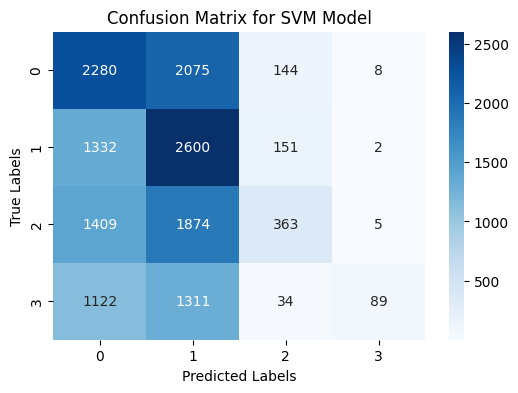

In [30]:
cm = confusion_matrix(y_test_nb, y_pred_svc_tuning, labels=grid_search.classes_)
cm_df = pd.DataFrame(cm, index=grid_search.classes_, columns=grid_search.classes_)

plt.figure(figsize=(6, 4))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for SVM Model')
plt.show()

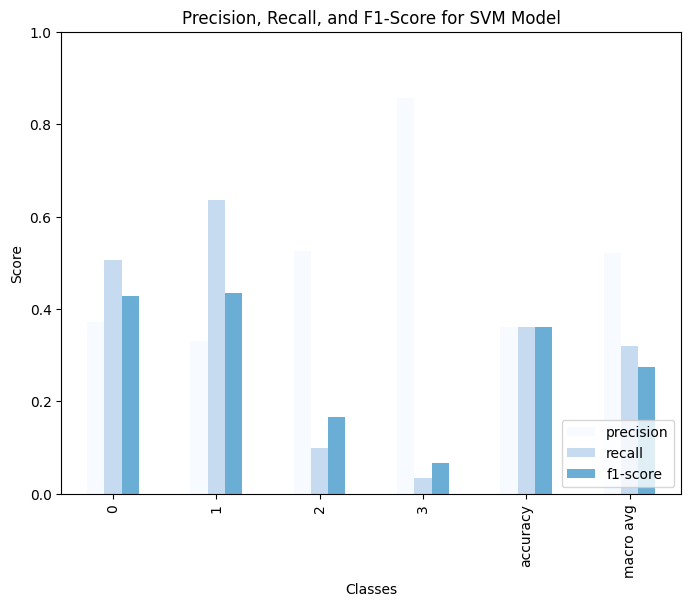

In [31]:
report = classification_report(y_test_nb, y_pred_svc_tuning, output_dict=True)
report_df = pd.DataFrame(report).transpose()

report_df[['precision', 'recall', 'f1-score']].iloc[:-1].plot(kind='bar', figsize=(8, 6), color=plt.cm.Blues(range(0, 256, 64)))
plt.title("Precision, Recall, and F1-Score for SVM Model")
plt.xlabel("Classes")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.show()

In [32]:
accuracy_score(y_test_nb, y_pred_svc_tuning)

0.36029461450097977

3. LSTM

In [ ]:
def preprocess_data(X_train, X_test, maxlen):
    X_train = np.array(X_train)
    X_test = np.array(X_test)
    X_train = pad_sequences(X_train, maxlen=maxlen, padding='post')
    X_test = pad_sequences(X_test, maxlen=maxlen, padding='post')
    return X_train, X_test

maxlen = 50
X_train, X_test = preprocess_data(X_train, X_test, maxlen=50)

y_train = np.array(y_train)
y_test = np.array(y_test)

# Define model builder for Keras Tuner
def model_builder(hp):
    # Hyperparameters for tuning
    embedding_dim = hp.Int('embedding_dim', min_value=16, max_value=128, step=16)
    lstm_units = hp.Int('lstm_units', min_value=32, max_value=128, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.5, step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])

    # Define model
    inputs = Input(shape=(maxlen,))
    embedding = Embedding(input_dim=10000, output_dim=embedding_dim)(inputs)
    lstm = Bidirectional(LSTM(lstm_units, return_sequences=True))(embedding)

    # Attention mechanism
    attention_scores = Dot(axes=[2, 2])([lstm, lstm])  # Attention scores
    attention_weights = Activation('softmax')(attention_scores)  # Softmax activation
    context_vector = Dot(axes=[2, 1])([attention_weights, lstm])  # Context vector

    # Pooling and output
    context_vector = GlobalAveragePooling1D()(context_vector)
    dropout = Dropout(dropout_rate)(context_vector)
    output = Dense(4, activation='softmax')(dropout)

    # Compile model
    model = Model(inputs=inputs, outputs=output)
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize tuner
tuner = kt.Hyperband(
    model_builder,
    objective='val_accuracy',
    max_epochs=15,
    factor=3,
    directory='tuner_dir',
    project_name='sentiment_analysis_tuning'
)

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)

# Perform hyperparameter search
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=128,
    callbacks=[early_stopping]
)

# Retrieve best hyperparameters and model
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
Best hyperparameters:
- Embedding dimension: {best_hps.get('embedding_dim')}
- LSTM units: {best_hps.get('lstm_units')}
- Dropout rate: {best_hps.get('dropout_rate')}
- Learning rate: {best_hps.get('learning_rate')}
""")

# Build the best model
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=15,
    batch_size=128,
    callbacks=[early_stopping]
)

Trial 26 Complete [00h 19m 24s]
val_accuracy: 0.7279545664787292

Best val_accuracy So Far: 0.8525575995445251
Total elapsed time: 04h 02m 24s

Best hyperparameters:
- Embedding dimension: 48
- LSTM units: 64
- Learning rate: 0.01

Epoch 1/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 82s 172ms/step - accuracy: 0.4965 - loss: 1.1301 - val_accuracy: 0.7457 - val_loss: 0.6596
Epoch 2/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 79s 170ms/step - accuracy: 0.8130 - loss: 0.5068 - val_accuracy: 0.8101 - val_loss: 0.5142
Epoch 3/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 82s 171ms/step - accuracy: 0.8812 - loss: 0.3130 - val_accuracy: 0.8288 - val_loss: 0.4879
Epoch 4/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 83s 173ms/step - accuracy: 0.9131 - loss: 0.2291 - val_accuracy: 0.8403 - val_loss: 0.4869
Epoch 5/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 77s 167ms/step - accuracy: 0.9281 - loss: 0.1865 - val_accuracy: 0.8432 - val_loss: 0.5054
Epoch 6/15
463/463 ━━━━━━━━━━━━━━━━━━━━ 84s 172ms/step - accuracy: 0.9361 - loss: 0.1636 - val_accuracy: 0.8488 -

In [ ]:
y_pred_tuning = np.argmax(best_model.predict(X_test), axis=1)

463/463 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step


In [ ]:
label_mapping = {
    0: "Negative",
    1: "Positive",
    2: "Neutral",
    3: "Irrelevant"}

In [ ]:
y_pred_tuning_label = np.vectorize(label_mapping.get)(y_pred_tuning)
y_test_label = np.vectorize(label_mapping.get)(y_test)

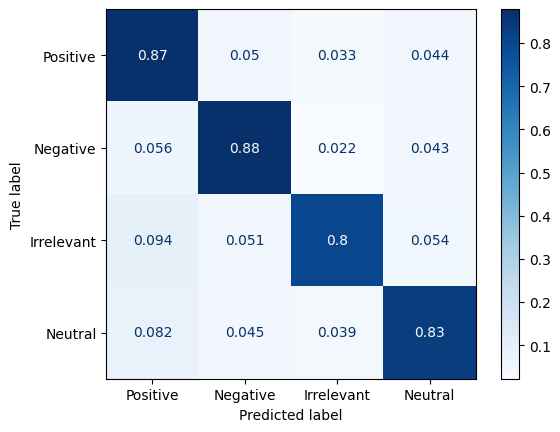

In [ ]:
y_unique = list(set(y_test_label))
cm = confusion_matrix(y_test_label, y_pred_tuning_label, labels = y_unique, normalize='true')

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y_unique)
disp.plot(cmap='Blues')

In [ ]:
accuracy_score(y_test, y_pred_tuning)

0.8528954659098588

**Conclusion**

with high metric accuracy then we choose to use the LSTM model.

**Reference**

1. https://github.com/anmolrk/Social-Media-Sentiment-Analysis/tree/main/data

2. https://d2l.ai/

3. https://www.analyticsvidhya.com/

4. https://xbe.at/

5. https://www.tensorflow.org/guide/keras